<a href="https://colab.research.google.com/github/KristoferArro/CovidVaxEstonia/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [ ]:
# Read in the dataset(s)
covid = pd.read_csv('https://github.com/KristoferArro/CovidVaxEstonia/blob/main/opendata_covid19_vaccination_location_county_agegroup_gender.csv?raw=true')
total = pd.read_csv('https://github.com/KristoferArro/CovidVaxEstonia/blob/main/opendata_covid19_vaccination_total.csv?raw=true')
county_total = pd.read_csv('https://github.com/KristoferArro/CovidVaxEstonia/blob/main/opendata_covid19_vaccination_location_county.csv?raw=true')
statData = pd.read_csv('https://github.com/KristoferArro/CovidVaxEstonia/blob/main/ESTStatsData.csv?raw=true')

In [ ]:
# Start cleaning the dataset

# Remove unnecessary columns
del covid['TargetDisease']
del covid['TargetDiseaseCode']
del covid['LocationCountry']
del covid['LocationCountryEHAK']
del covid['LocationCountyEHAK']
del covid['LocationLevel']

del total['TargetDiseaseCode']
del total['TargetDisease']

del county_total['TargetDiseaseCode']
del county_total['TargetDisease']
del county_total['LocationCountry']
del county_total['LocationCountryEHAK']
del county_total['LocationCountyEHAK']
del county_total['LocationLevel']


In [ ]:
# Remove rows, which values we don't want.
covid = covid.drop(covid[covid.MeasurementType == 'DosesAdministered'].index)
covid = covid.drop(covid[covid.MeasurementType == 'FullyVaccinated'].index)

total = total.drop(total[total.MeasurementType == 'DosesAdministered'].index)
total = total.drop(total[total.MeasurementType == 'FullyVaccinated'].index)

county_total = county_total.drop(county_total[county_total.MeasurementType == 'DosesAdministered'].index)
county_total = county_total.drop(county_total[county_total.MeasurementType == 'FullyVaccinated'].index)

# Then, also drop rows, which values are NaN
# We need to remove Nan values from columns: "LocationCounty", "AgeGroup", "Gender"

covid.dropna(subset=['LocationCounty'], inplace=True)
covid.dropna(subset=['AgeGroup'], inplace=True)
covid.dropna(subset=['Gender'], inplace=True)

county_total.dropna(subset=['LocationCounty'], inplace=True)

# Reset indexes

covid.reset_index(drop=True, inplace=True)
total.reset_index(drop=True, inplace=True)
county_total.reset_index(drop=True, inplace=True)



In [ ]:
county_daily = county_total[['StatisticsDate', 'LocationCounty', 'DailyCount', 'LocationPopulation']]

In [ ]:
county = county_total[['StatisticsDate', 'LocationCounty','PopulationCoverage']]

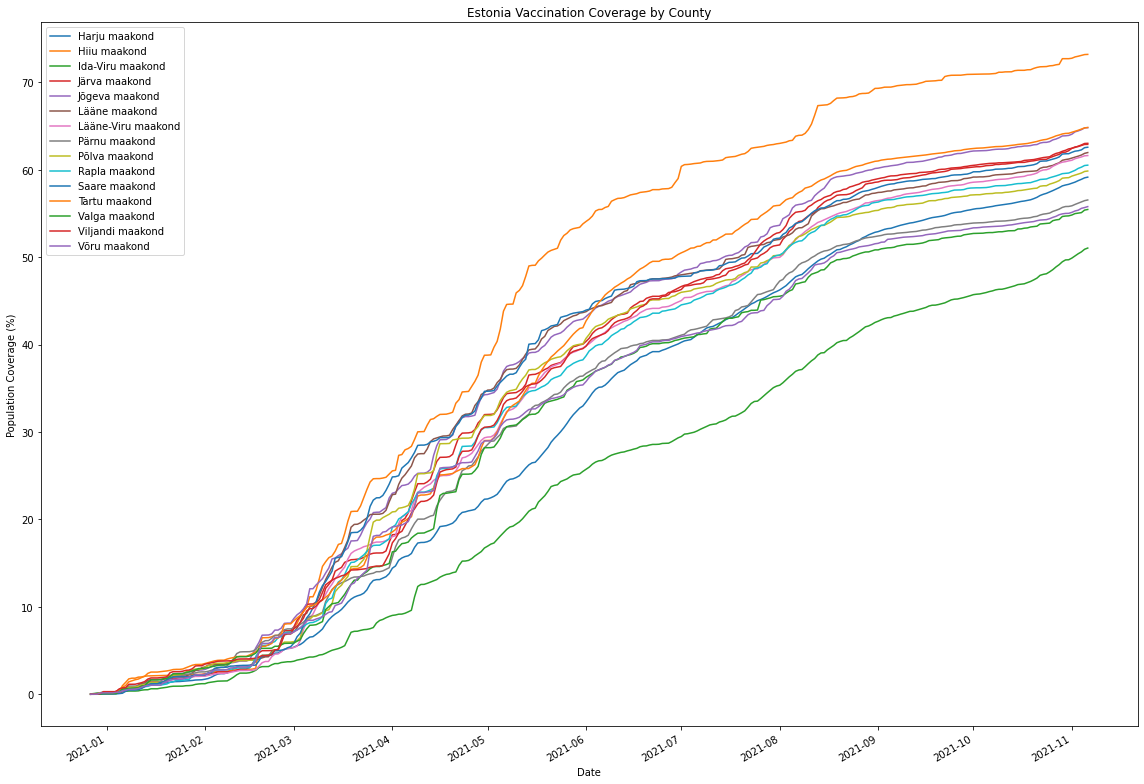

In [ ]:
counties = ["Harju maakond", "Hiiu maakond", "Ida-Viru maakond", "Järva maakond", "Jõgeva maakond", "Lääne maakond", "Lääne-Viru maakond", "Pärnu maakond", "Põlva maakond", "Rapla maakond", "Saare maakond", "Tartu maakond", "Valga maakond", "Viljandi maakond", "Võru maakond"]


for one_county in counties:
  df = county.drop(county[county.LocationCounty != one_county].index)
  df.reset_index(drop=True, inplace=True)
  df['StatisticsDate'] = pd.to_datetime(df['StatisticsDate'])
  plt.plot(df['StatisticsDate'], df['PopulationCoverage'], label = one_county)


plt.title('Estonia Vaccination Coverage by County')
plt.xlabel('Date')
plt.ylabel('Population Coverage (%)')
plt.gcf().set_size_inches(16.0, 11.0)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

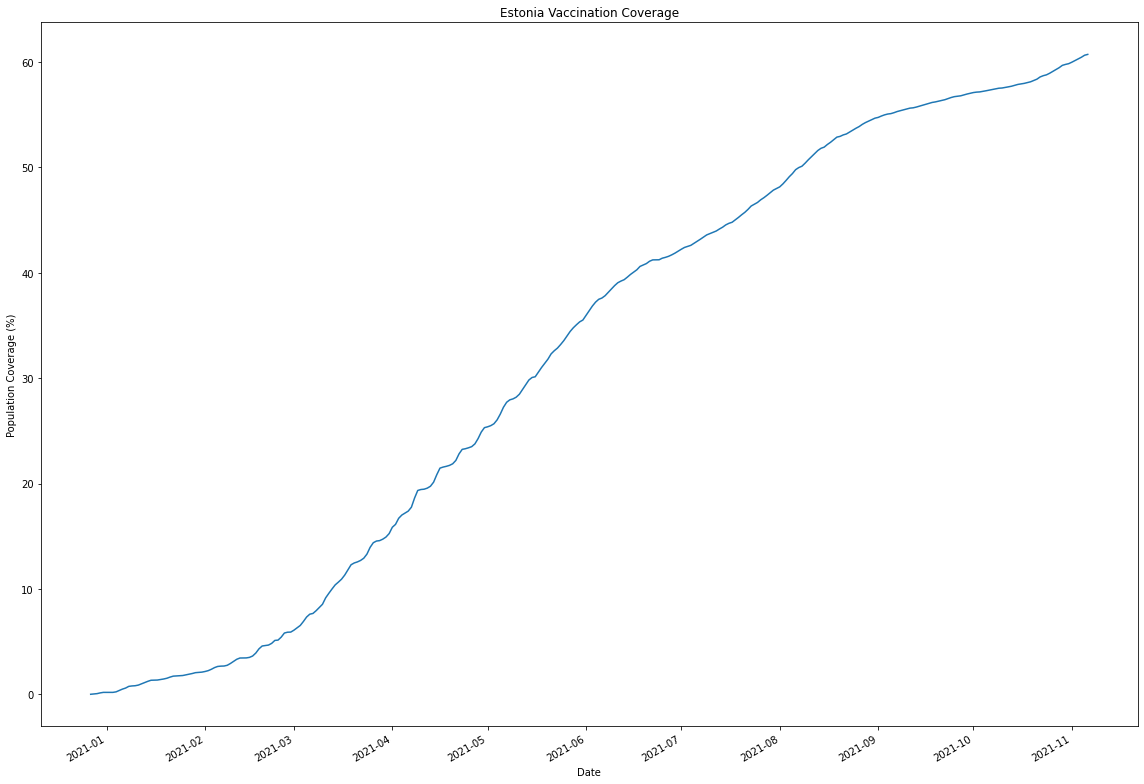

In [ ]:
total['StatisticsDate'] = pd.to_datetime(total['StatisticsDate'])
plt.plot(total['StatisticsDate'], total['PopulationCoverage'])
plt.title('Estonia Vaccination Coverage')
plt.xlabel('Date')
plt.ylabel('Population Coverage (%)')
plt.gcf().set_size_inches(16.0, 11.0)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
county_daily['DailyPer100kPeople'] = county_daily['DailyCount'] / (county_daily['LocationPopulation'] / 100000)
county_daily.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StatisticsDate,LocationCounty,DailyCount,LocationPopulation,DailyPer100kPeople
0,2020-12-27,Harju maakond,85,605029,14.048913
1,2020-12-27,Hiiu maakond,0,9315,0.000000
2,2020-12-27,Ida-Viru maakond,49,134259,36.496622
3,2020-12-27,Järva maakond,0,30174,0.000000
4,2020-12-27,Jõgeva maakond,4,28442,14.063709


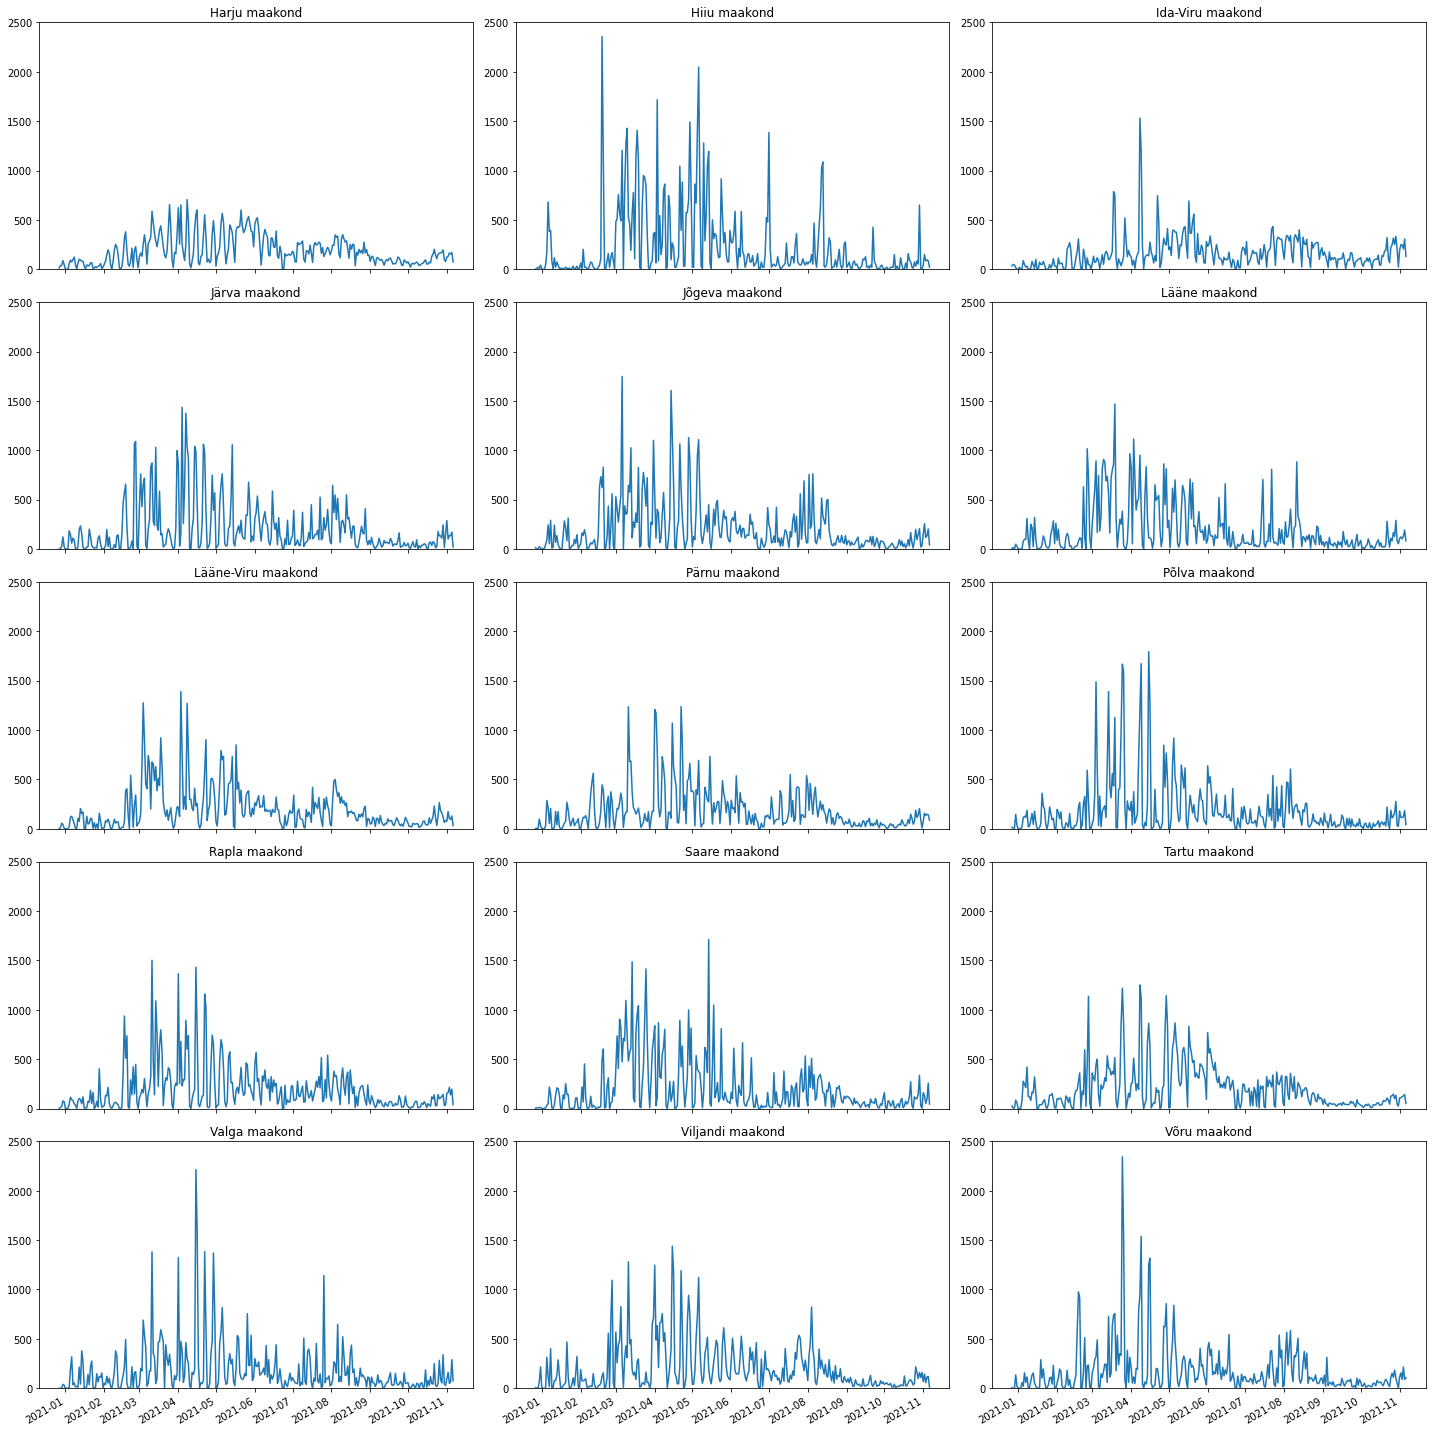

In [ ]:
fig, axs = plt.subplots(5,3, figsize=(20,20))

row_counter = 0
column_counter = 0
for one_county in counties:
  df = county_daily.drop(county_daily[county_daily.LocationCounty != one_county].index)
  df.reset_index(drop=True, inplace=True)
  df['StatisticsDate'] = pd.to_datetime(harjuP['StatisticsDate'])
  axs[row_counter, column_counter].plot(df['StatisticsDate'], df['DailyPer100kPeople'])
  axs[row_counter, column_counter].set_title(one_county)
  axs[row_counter, column_counter].set_ylim([0,2500])

  if (column_counter >= 2):
    column_counter = 0
    row_counter += 1
  else:
    column_counter += 1

fig.autofmt_xdate()


In [ ]:
#Let's see if there are any correlations between counties vaccination state and all kinds of other statistics

corr_county_data = county_total.loc[county_total['StatisticsDate'] == '2021-11-06']
corr_county_data = corr_county_data.reset_index()
corr_data = pd.merge(statData,corr_county_data['PopulationCoverage'], left_index=True, right_index=True, how='outer')
#Calculating Pearson, Spearman and Kendall correlation coefficients
corr_data_pearson = corr_data.corr()
corr_data_spearman = corr_data.corr(method='spearman')
corr_data_kendall = corr_data.corr(method='kendall')
#Bundeling them up into one dataframe
corr_data_all = pd.DataFrame({'Pearson':corr_data_pearson['PopulationCoverage'],'Spearman':corr_data_spearman['PopulationCoverage'],'Kendall':corr_data_kendall['PopulationCoverage']})
#Outputting results
corr_data_all[:][:-1]

,Pearson,Spearman,Kendall
Gross monthly earnings,-0.035312,0.025000,0.009524
Average hours of work per month for one employee,-0.039947,-0.161728,-0.107890
Births,-0.131894,-0.278571,-0.200000
Deaths,-0.281572,-0.342857,-0.238095
Natural increase,0.530484,0.477212,0.306224
Housing places,-0.188481,-0.267857,-0.142857
Overnight stays of accommodated guests,-0.261436,-0.375000,-0.257143
Destroyed forest stands,-0.220615,-0.267857,-0.161905
Industrial production,-0.221997,-0.371429,-0.238095
Basic education graduates,-0.179615,-0.335714,-0.238095


As seen from the above table, not one strong correlation between counties vaccination and other counties statistics was found. The strongest correlation was Natural increase with Pearsons coefficience, but even that barely crossed the 0.5 mark. All other correlations were either weak or non-existent